In [32]:
import time
import numpy as np
import json
from glob import glob
from tqdm import tqdm
import pandas as pd
from utils import get_hour_crawl_df_lst, get_daily_origin_df_dict
from concurrent.futures import ProcessPoolExecutor
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from IPython.display import clear_output
sns.set_palette("Set1", 7)
sns.color_palette("Set1", 7)

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392)]

In [33]:
weeks = sorted(glob('/mnt/sdc/tnecniv-2023-Feb-March/data/2023-*'))
week_data_path = [sorted(glob(w+'/*')) for w in weeks]
day_data = [sorted(glob(d+'/*.json')) for w in week_data_path for d in w ]
day_data = [[d[i] for i in np.arange(0, 288, 2)] for d in day_data]
mature_game_list = ['Grand Theft Auto V', 'Counter-Strike: Global Offensive', 'Call of Duty: Warzone', 'Escape from Tarkov', 'Dead by Daylight', 'Slots', 'ELDEN RING', 'Hunt: Showdown', 'DayZ', 'Rust', 'Diablo III', 'Lost Ark', "Tom Clancy's Rainbow Six Siege", 'Red Dead Redemption 2', 'Resident Evil 4', 'Phasmophobia', 'Diablo II: Resurrected', 'HITMAN World of Assassination', 'Last Epoch']


In [34]:
# def get_week_game_rankings(day) -> dict:
#     result = {}
#     for i, json in enumerate(day):
#         res = pd.read_json(json, dtype=str)[['game_name', 'viewer_count']].astype({'viewer_count': int}).groupby('game_name').sum().to_dict()['viewer_count']
#         for gn in res.keys():
#             try:
#                 result[gn]['vc'] += res[gn]
#                 result[gn]['ct'] += 1
#             except:
#                 result[gn] = {'vc': res[gn], 'ct': 1}
#     return result
# rankings = {}
# with ProcessPoolExecutor() as executor:
#     for result in list(tqdm(executor.map(get_week_game_rankings, day_data), total=len(day_data))):
#         for gn in result.keys():
#             try:
#                 rankings[gn]['vc'] += result[gn]['vc']
#                 rankings[gn]['ct'] += result[gn]['ct']
#             except:
#                 rankings[gn] = {'vc': result[gn]['vc'], 'ct': result[gn]['ct']}
# rk_df = pd.DataFrame(rankings).T
# rk_df['avg'] = rk_df['vc'] / rk_df['ct']
# rk_df = rk_df[(rk_df['ct'] > 100) & (rk_df.index != '')].sort_values('avg', ascending=False).reset_index()
# ratings = pd.read_csv('./result/game_ratings_simplified_sorted.csv', dtype=str)
# game_ratings = pd.merge(rk_df, ratings, left_on='index', right_on='game_name')[['game_name', 'ratings']]


In [35]:
# def get_mature_games_viewer_count(day):
#     mg_sc = {g:[] for g in mature_game_list}
#     mg_vc = {g:[] for g in mature_game_list}
#     for json in tqdm(day):
#         df =  pd.read_json(json, dtype=str)
#         df = df[df['game_name'].isin(mature_game_list)].astype({'viewer_count': int})
#         sc = df[['game_name', 'user_login']].groupby('game_name').count().to_dict()['user_login']
#         vc = df[['game_name', 'viewer_count']].groupby('game_name').sum().to_dict()['viewer_count']
#         for g in mature_game_list:
#             try:
#                 mg_vc[g].append(vc[g])
#             except:
#                 mg_vc[g].append(0)
#             try:
#                 mg_sc[g].append(sc[g])
#             except:
#                 mg_sc[g].append(0)
#     return mg_sc, mg_vc

# with ProcessPoolExecutor() as executor:
#     for res_sc, res_vc in executor.map(get_mature_games_viewer_count, day_data):
#         for mg in mature_game_list:
#             mature_game_sc[mg].extend(res_sc[mg])
#             mature_game_vc[mg].extend(res_vc[mg])

In [36]:
mature_game_sc = pd.read_csv('./result_collection/23_march_mature/20_mature_games_sc.csv', dtype=int).T
mature_game_vc = pd.read_csv('./result_collection/23_march_mature/20_mature_games_vc.csv', dtype=int).T

mature_game_vc.insert(0, 'avg', mature_game_vc.mean(axis=1))

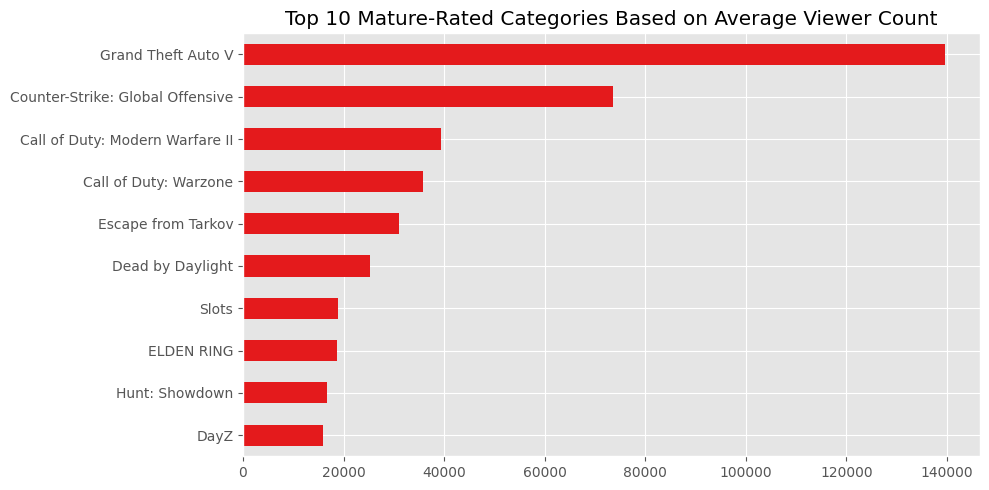

In [37]:
n = 10
fig, ax = plt.subplots(1, figsize=(10, 5))
mature_game_vc['avg'][:n].plot(kind='barh').invert_yaxis()
ax.set_title(f'Top {n} Mature-Rated Categories Based on Average Viewer Count')
fig.tight_layout()

In [38]:
# results = {(g, b):[] for g in mature_game_list for b in ['True', 'False']}

# def get_is_mature_game(day):
#     res = {(g, b):[] for g in mature_game_list for b in ['True', 'False']}
#     for json in tqdm(day):
#         df =  pd.read_json(json, dtype=str)
#         df = df[df['game_name'].isin(mature_game_list)]
#         res_dict = df[df['game_name'].isin(mature_game_list)][['user_login', 'game_name', 'is_mature']].groupby(['game_name', 'is_mature']).count().to_dict()['user_login']
#         for k in res.keys():
#             try:
#                 res[k].append(res_dict[k])
#             except:
#                 res[k].append(0)
#     return res

# with ProcessPoolExecutor() as executor:
#     for res in executor.map(get_is_mature_game, day_data):
#         for k in results.keys():
#             results[k].extend(res[k])

In [39]:
games_is_mature = pd.read_csv('./result_collection/23_march_mature/20_mature_games_honesty.csv', header=[0, 1]).T
games_is_mature.insert(0, 'avg', games_is_mature.mean(axis=1))
games_is_mature = games_is_mature['avg'].to_frame()
games_is_mature

avg
Grand Theft Auto V               True    993.874504
                                 False  1769.449901
Counter-Strike: Global Offensive True    286.839782
                                 False   971.717758
Call of Duty: Modern Warfare II  True   1542.073909
                                 False  3384.559028
Call of Duty: Warzone            True    750.580853
                                 False  1115.970734
Escape from Tarkov               True    433.981151
                                 False   432.854167
Dead by Daylight                 True    774.607143
                                 False   830.928075
Slots                            True     53.813988
                                 False    46.571429
ELDEN RING                       True    236.931548
                                 False   436.676091
Hunt: Showdown                   True    191.458829
                                 False   119.692956
DayZ                             True    137.933532
                                 False   174.770833
Rust                             True    122.617560
                                 False   260.549603
Diablo III                       True    173.298611
                                 False   128.001984
Lost Ark                         True     81.361111
                                 False   225.847718
Tom Clancy's Rainbow Six Siege   True    275.517857
                                 False   800.892857
Red Dead Redemption 2            True    171.855655
                                 False   196.277778
Resident Evil 4                  True     52.000496
                                 False    86.294147
Phasmophobia                     True    149.398313
                                 False   140.918651
Diablo II: Resurrected           True     46.762401
                                 False    68.247520
HITMAN World of Assassination    True     21.353671
                                 False    27.934028
Last Epoch                       True     14.865079
                                 False    13.263889

Text(0.5, 1.0, 'Conformity Ratio of Top 9 Mature-Rated Categories | 230226~230311')

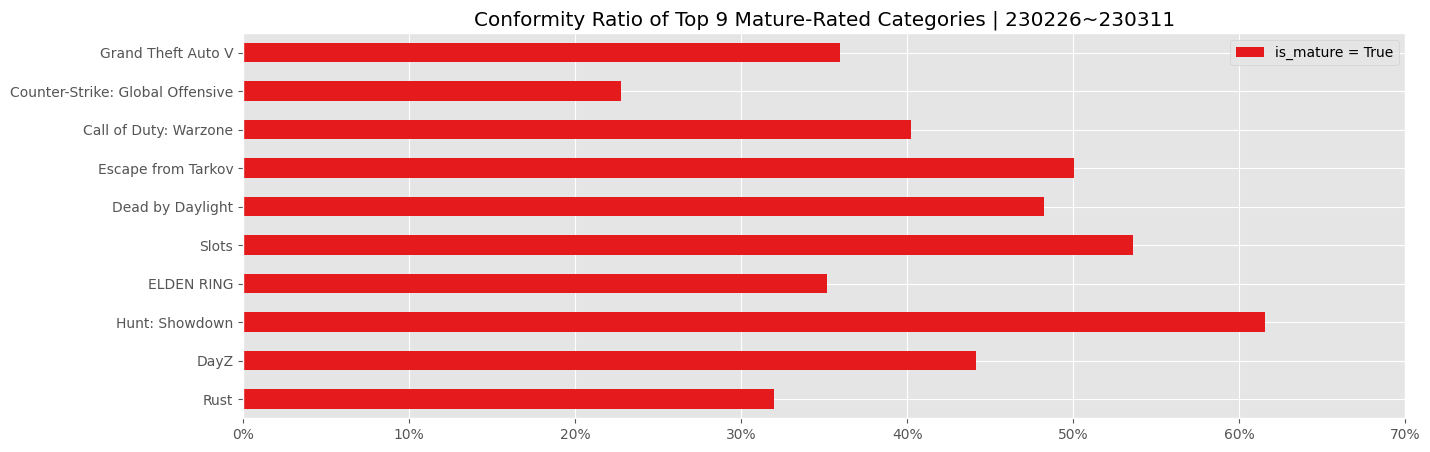

In [43]:
game_is_mature_dict = games_is_mature.to_dict()['avg']
game_honesty_df = pd.Series({g:game_is_mature_dict[(g, 'True')] / (game_is_mature_dict[(g, 'True')] + game_is_mature_dict[(g, 'False')]) for g in mature_game_list[:n]}).to_frame()
game_honesty_df.columns = ['is_mature = True']
fig, ax = plt.subplots(1, figsize=(15, 5))
game_honesty_df.plot(kind='barh', ax=ax).invert_yaxis()
ax.set_xticks(ax.get_xticks(), [s+'%' for s in np.round(ax.get_xticks()*100).astype(int).astype(str)])
ax.set_title(f'Conformity Ratio of Top 9 Mature-Rated Categories | 230226~230311')


In [41]:
game_honesty_df

,is_mature = True
Grand Theft Auto V,0.359666
Counter-Strike: Global Offensive,0.227912
Call of Duty: Warzone,0.402122
Escape from Tarkov,0.500650
Dead by Daylight,0.482460
Slots,0.536074
ELDEN RING,0.351735
Hunt: Showdown,0.615323
DayZ,0.441099
Rust,0.320011
